## TOC:
* [Lab | Cleaning numerical data](#first-bullet)
* [Lab | Cleaning categorical data](#second-bullet)
* [Lab | Feature extraction](#third-bullet)


## Lab | Cleaning numerical data <a class="anchor" id="first-bullet"></a>

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


1. Import the necessary libraries.

In [632]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df



In [633]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


3. First look at its main features (head, shape, info).



In [634]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

The data has no NaN values

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [635]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.lower()

5. Change effective to date column to datetime format.



In [636]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])   #changing the type of the column to datetime 
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

<AxesSubplot:>

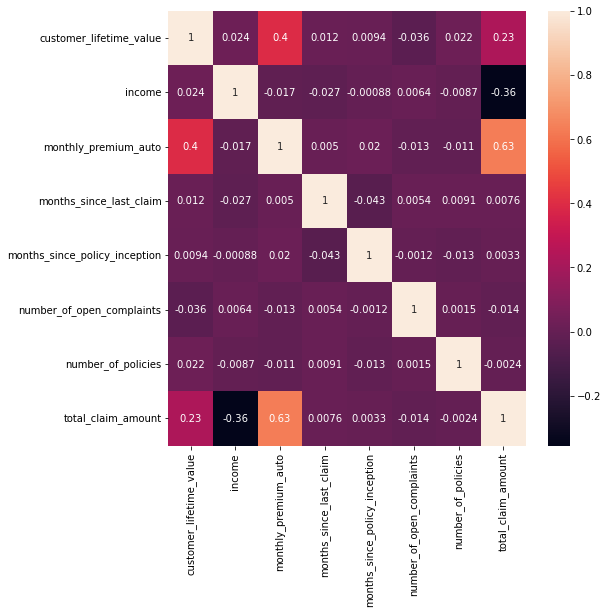

In [637]:
sns.heatmap(customer_df.corr(),annot=True)

In [638]:
X = customer_df.drop(['total_claim_amount'], axis=1)
y = customer_df['total_claim_amount']

In [639]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



In [640]:
#SPLIT NUMERICAL:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num = X_train._get_numeric_data()
print(X_train_num.nunique())
print("-------")
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num = X_test._get_numeric_data()
print(X_test_num.nunique())

customer_lifetime_value          6074
income                           4333
monthly_premium_auto              187
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
dtype: int64
-------
customer_lifetime_value          2150
income                           1574
monthly_premium_auto              161
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
dtype: int64


In [641]:
#We can say discrete vbles are the ones whose range is higher than 100
def cont_discr(df):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= 100:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous

In [642]:
cont_discr(X_train_num)
cont_discr(X_test_num)

(['months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'],
 ['customer_lifetime_value', 'income', 'monthly_premium_auto'])

In [643]:
#We select the columns to create a DF with only dicrete variables: 

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_dis= X_train_num[['months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies']]
X_train_num_dis = X_train_num_dis.reset_index().drop(["index"], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_dis = X_test_num[['months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies']]
X_test_num_dis = X_test_num_dis.reset_index().drop(["index"], axis=1)

In [644]:
#We select the columns to create a DF with only continuous variables:

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con = X_train_num[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
X_train_num_con = X_train_num_con.reset_index()
X_train_num_con = X_train_num_con.reset_index().drop(["level_0",'index'], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con = X_test_num[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
X_test_num_con = X_test_num_con.reset_index()
X_test_num_con = X_test_num_con.reset_index().drop(["level_0",'index'], axis=1)

8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

I will carry this analysis just with the train set as the plots will serve to define both train and test sets 

months_since_last_claim


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


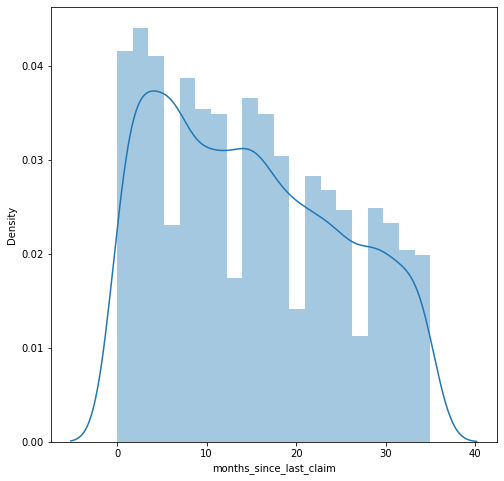

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


months_since_policy_inception


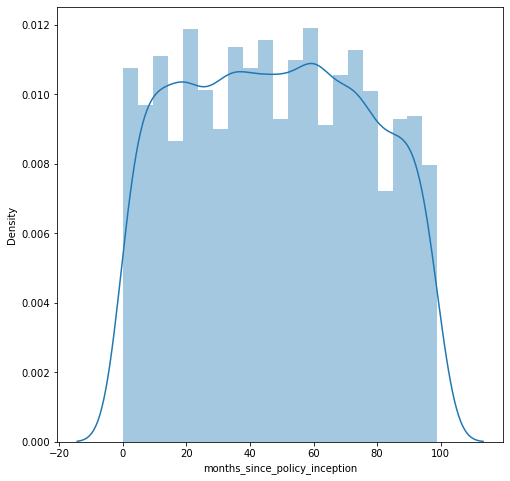

number_of_open_complaints


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


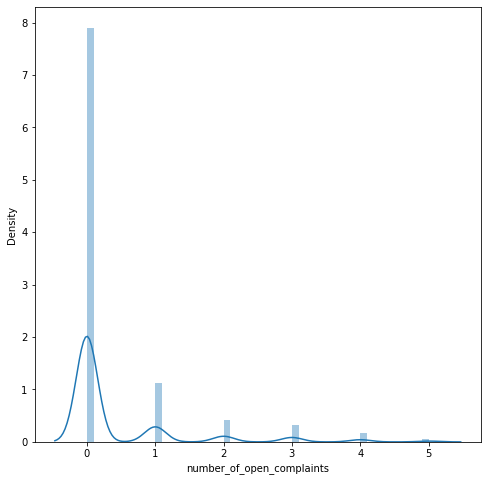

number_of_policies


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


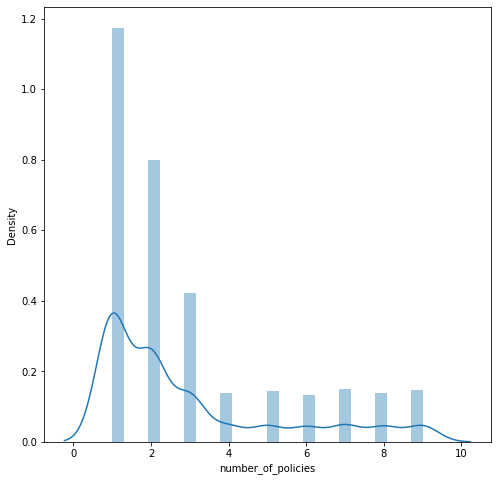

In [645]:
#https://stackoverflow.com/questions/53310228/how-can-i-make-seaborn-distribution-subplots-in-a-loop
plt.rc('figure', figsize=(8,8))  
fig=plt.figure()
def plot_dis(df):
    for i in df.columns:
        print(i)
        sns.distplot(df[i])
        plt.show()
plot_dis(X_train_num_dis)

9. Comment what you can see in the plots.



Discrete Vbles: 

months_since_last_claim: very few outliers

months_since_policy_inception: very few outliers

number_of_open_complaints:
The majority of the observations have 0 open complaints, and then the amount of customers that have 2, 3, 4 complaints reduces consistently.


number_of_policies:
Also shows the majority of customers have only 1 policy and the numebr of customers that have 2,3... reduces as well. NO outliers to nbe taken out.

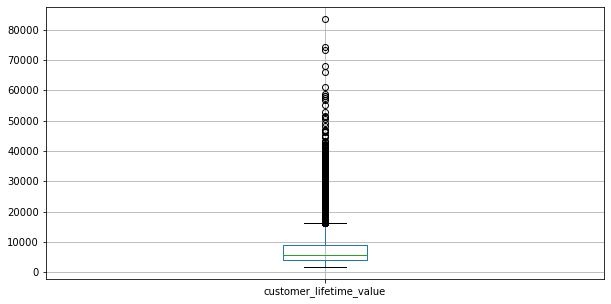

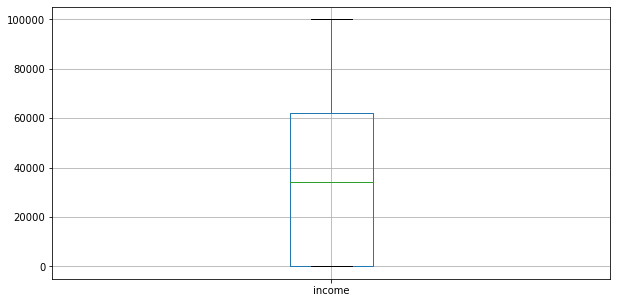

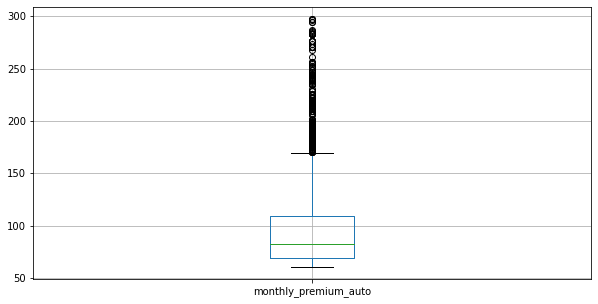

In [646]:
def plot_con(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        df.boxplot(col)
plot_con(X_train_num_con)

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



Continuous variables:

customer_lifetime_value: the plot shows many outliers, but is just skewed, they are relevant, 
I will take out just the most extreme ones (10%)

income: very few outliers 

monthly_premium_aut: many outliers 

total_claim_amount: many outliers 

11. Did you find outliers?  Comment what you will do with them.



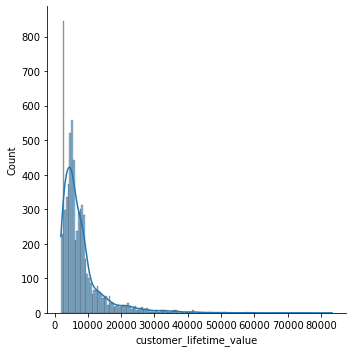

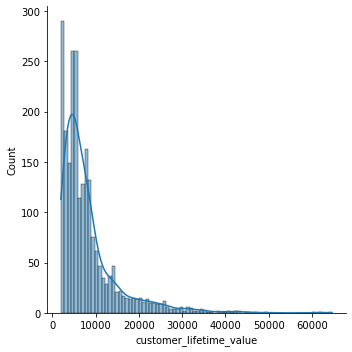

count     2284.000000
mean      8241.337038
std       6898.695147
min       2004.350666
25%       4128.312232
50%       5926.557410
75%       9345.117163
max      64618.757150
Name: customer_lifetime_value, dtype: float64

In [647]:
#Customer_lifetime_value: the plot shows many outliers, but is just skewed, they are relevant, 
#I will take out just the most extreme ones (10%)

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con[['customer_lifetime_value']].describe()
sns.displot(X_train_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_train_num_con['customer_lifetime_value'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con[['customer_lifetime_value']].describe()
sns.displot(X_test_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_test_num_con['customer_lifetime_value'].describe()

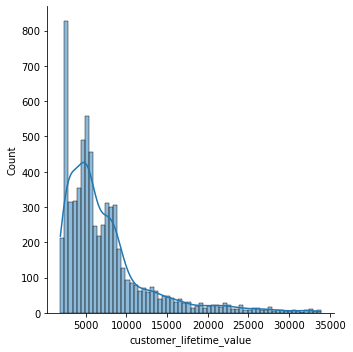

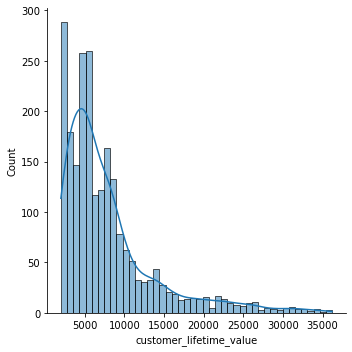

count     2265.000000
mean      7929.982983
std       5983.405066
min       2004.350666
25%       4110.620178
50%       5889.509098
75%       9233.190660
max      36181.028920
Name: customer_lifetime_value, dtype: float64

In [648]:
# PERCENTILE 95
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
iqr = np.percentile(X_train_num_con['customer_lifetime_value'],90) - np.percentile(X_train_num_con['customer_lifetime_value'],10)
upper_limit = np.percentile(X_train_num_con['customer_lifetime_value'],90) + 1.5*iqr
lower_limit = np.percentile(X_train_num_con['customer_lifetime_value'],10) - 1.5*iqr

X_train_num_con = X_train_num_con[(X_train_num_con['customer_lifetime_value']>lower_limit) & (X_train_num_con['customer_lifetime_value']<upper_limit)].copy()
sns.displot(X_train_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_train_num_con['customer_lifetime_value'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
iqr = np.percentile(X_test_num_con['customer_lifetime_value'],90) - np.percentile(X_test_num_con['customer_lifetime_value'],10)
upper_limit = np.percentile(X_test_num_con['customer_lifetime_value'],90) + 1.5*iqr
lower_limit = np.percentile(X_test_num_con['customer_lifetime_value'],10) - 1.5*iqr

X_test_num_con = X_test_num_con[(X_test_num_con['customer_lifetime_value']>lower_limit) & (X_test_num_con['customer_lifetime_value']<upper_limit)].copy()
sns.displot(X_test_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_test_num_con['customer_lifetime_value'].describe()

The 95% percentile is still around 35.000 value so its a good thing we still keep the chunck of the data

monthly_premium_auto: many outliers 

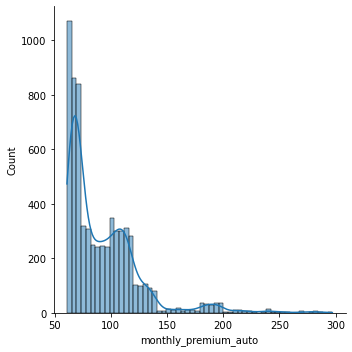

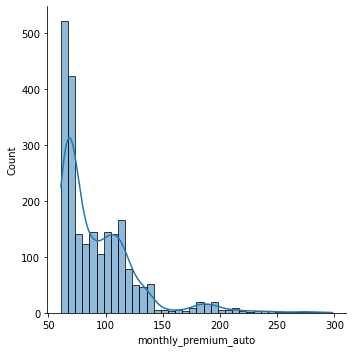

count    2265.000000
mean       93.089183
std        34.725565
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64

In [649]:
# monthly_premium_auto: the plot does not show outliers, is just a bit  skewed.
#With the scaling will be enough 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con[['monthly_premium_auto']].describe()
sns.displot(X_train_num_con['monthly_premium_auto'],kde=True)
plt.show()
X_train_num_con['monthly_premium_auto'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con[['monthly_premium_auto']].describe()
sns.displot(X_test_num_con['monthly_premium_auto'],kde=True)
plt.show()
X_test_num_con['monthly_premium_auto'].describe()

12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.



In [650]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
print(X_train_num_con.isnull().sum())
print(X_train_num_dis.isnull().sum())
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
print(X_test_num_con.isnull().sum())
print(X_test_num_dis.isnull().sum())

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
dtype: int64
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64
customer_lifetime_value    0
income                     0
monthly_premium_auto       0
dtype: int64
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64


NORMALISING DISCRETE VBLES WITH MinMaxScaler

In [651]:
#We only fit the train set in the transformer:
transformer = MinMaxScaler().fit(X_train_num_dis)
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_dis_norm = transformer.transform(X_train_num_dis)
X_train_num_d_n= pd.DataFrame(X_train_num_dis_norm, columns=X_train_num_dis.columns)

#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_dis_norm = transformer.transform(X_test_num_dis)
X_test_num_d_n= pd.DataFrame(X_test_num_dis_norm, columns=X_test_num_dis.columns)


NORMALISING CONTINUOUS VBLES WITH StandardScaler 

In [652]:
#We only fit the train set in the transformer:
transformer = StandardScaler().fit(X_train_num_con)
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con_st= transformer.transform(X_train_num_con)
X_train_num_c_st= pd.DataFrame(X_train_num_con_st, columns=X_train_num_con.columns)
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con_st= transformer.transform(X_test_num_con)
X_test_num_c_st= pd.DataFrame(X_test_num_con_st, columns=X_test_num_con.columns)

In [653]:
X_train_num_c_st

,customer_lifetime_value,income,monthly_premium_auto
0,-0.871043,1.674876,-0.732258
1,-0.659215,1.381347,0.169097
2,0.452121,-0.002585,-0.882484
3,0.253645,1.481286,0.649820
4,-0.960597,-0.319058,-0.942574
...,...,...,...
6755,0.668350,-1.239836,0.259233
6756,-0.454384,-0.532201,1.070453
6757,0.075733,0.078063,-0.822393
6758,-0.875724,-0.365735,-0.732258


In [654]:
X_train_num_d_n

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.714286,0.333333,0.0,0.000
1,0.171429,0.040404,0.0,0.000
2,0.828571,0.909091,0.0,0.125
3,0.685714,0.101010,0.6,1.000
4,0.200000,0.383838,0.0,0.000
...,...,...,...,...
6845,0.285714,0.484848,0.0,0.125
6846,0.885714,0.585859,0.0,0.000
6847,0.057143,0.858586,0.0,0.125
6848,0.514286,0.868687,0.2,0.000


NOW I CONCATENATE THE 2 DF IN 1 NUMERICAL PROCESSED

In [655]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_train = pd.concat([X_train_num_d_n, X_train_num_c_st], axis=1)
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_test = pd.concat([X_test_num_d_n, X_test_num_c_st], axis=1)

In [656]:
#There are some NaN values, due to the outliers I took off
print(data_num_train.isna().sum())
print(data_num_test.isna().sum())

months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
customer_lifetime_value          90
income                           90
monthly_premium_auto             90
dtype: int64
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
customer_lifetime_value          19
income                           19
monthly_premium_auto             19
dtype: int64


I will fill NaNs as follows: 






In [657]:
#makes sense fill with the mean 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_train['customer_lifetime_value'].fillna((data_num_train['customer_lifetime_value'].mean()), inplace=True)
data_num_train['income'].fillna((data_num_train['income'].mean()), inplace=True)
data_num_train['monthly_premium_auto'].fillna((data_num_train['monthly_premium_auto'].mean()), inplace=True)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_test['customer_lifetime_value'].fillna((data_num_test['customer_lifetime_value'].mean()), inplace=True)
data_num_test['income'].fillna((data_num_test['income'].mean()), inplace=True)
data_num_test['monthly_premium_auto'].fillna((data_num_test['monthly_premium_auto'].mean()), inplace=True)

## Lab | Cleaning categorical data<a class="anchor" id="second-bullet"></a>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.


1. Import the necessary libraries if you are starting a new notebook.
Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv




2. Find  all of the categorical data.  Save it in a categorical_df variable.

In [658]:
#SPLIT CATEGORICAL:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat = X_train_cat.reset_index(drop = True)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat = X_test_cat.reset_index(drop = True)

3. Check for NaN values.



In [659]:
print(X_train_cat.isnull().any())
print(X_test_cat.isnull().any())

customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool
customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool


In [660]:
#reset index:
X_train_cat = X_train_cat.reset_index(drop = True)
X_test_cat = X_test_cat.reset_index(drop = True)

5. Check dtypes. Do they all make sense as categorical data?



In [661]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
display(X_train_cat)
display(X_train_cat.dtypes)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
display(X_test_cat)
display(X_test_cat.dtypes)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,MM45897,Nevada,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer3,Call Center,Four-Door Car,Large
1,WY21918,Washington,No,Extended,College,Employed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Branch,Four-Door Car,Medsize
2,PQ35034,Oregon,No,Basic,College,Employed,F,Rural,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Two-Door Car,Medsize
3,LH91968,Oregon,Yes,Basic,Bachelor,Employed,M,Rural,Married,Corporate Auto,Corporate L3,Offer2,Agent,SUV,Medsize
4,LA14484,Nevada,Yes,Basic,High School or Below,Retired,M,Suburban,Married,Special Auto,Special L1,Offer3,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,BB48165,California,No,Basic,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize
6846,QA32784,Oregon,No,Extended,Bachelor,Disabled,M,Suburban,Married,Personal Auto,Personal L3,Offer3,Call Center,Sports Car,Medsize
6847,UQ63396,California,No,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
6848,AI58500,Arizona,No,Basic,College,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer3,Web,Two-Door Car,Small


customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU72633,Nevada,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,SUV,Medsize
1,GF59560,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L2,Offer1,Call Center,Four-Door Car,Medsize
2,VF65535,California,No,Extended,College,Employed,F,Urban,Single,Corporate Auto,Corporate L2,Offer3,Agent,SUV,Medsize
3,UJ38473,California,No,Basic,Bachelor,Employed,M,Rural,Married,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Small
4,JE13986,Arizona,No,Extended,College,Employed,F,Suburban,Married,Personal Auto,Personal L1,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,ZT58755,Oregon,No,Basic,High School or Below,Unemployed,F,Urban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
2280,JZ54775,Arizona,No,Extended,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small
2281,ZF40671,Washington,No,Premium,Master,Medical Leave,F,Urban,Married,Personal Auto,Personal L2,Offer2,Call Center,Two-Door Car,Medsize
2282,OP52966,Arizona,No,Basic,High School or Below,Employed,M,Suburban,Married,Personal Auto,Personal L1,Offer2,Agent,Two-Door Car,Small


customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

NO.

policy,   policy_type,  vehicle_class  and customer have stings with numerical or just stings with 2 diff info

6. Does any column contain alpha and numeric data?  Decide how to clean it.



categorical_df['customer'] but is a customer_id.

I have checked the diff rows and they are all diff values (1 value per row) so its like a reg-number or name_id and they are all unique so makes no sense to treat them, so i drop the Customer column.

I decide to drop Response as doesnt add info to the data set 

In [662]:
X_train_cat.drop("customer", axis=1, inplace=True)
X_train_cat.drop("response", axis=1, inplace=True)
X_test_cat.drop("customer", axis=1, inplace=True)
X_test_cat.drop("response", axis=1, inplace=True)


7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.


The processing I would do, is required in the next questions, like reducing the number of unique values by grouping, ....


8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  


In [663]:
X_train_cat['policy_type'].value_counts()

Personal Auto     5089
Corporate Auto    1472
Special Auto       289
Name: policy_type, dtype: int64

Nothing to do as we cant group the values more than they are

We can split policy and keep  as policy_type as per the info found about L1, L2, L3 in https://link.springer.com/article/10.1057/gpp.2010.5

"In selected countries, third-party liability covers a third party inside or outside the vehicle; it covers property damage (L1) or bodily injury (L2). The coverage for bodily injury due to an intoxicated driver (L3) is included in L2. Spousal liability (L4) covers the liability of death or injury to the spouse.

They refer to the level of coverage of the policy. 

I am going to strip the type of policy as that inifo already appears in policy type 

In [664]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
# new data frame with split value columns
new = X_train_cat['policy'].str.split(" ", n = 1, expand = True)
# # making separate last name column from new data frame
X_train_cat["policy_coverage"]= new[1]
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
new2 = X_test_cat['policy'].str.split(" ", n = 1, expand = True)
# # making separate last name column from new data frame
X_test_cat["policy_coverage"]= new2[1]

In [665]:
# Dropping policy column
X_train_cat.drop(columns =['policy'], inplace = True, axis=1)
X_test_cat.drop(columns =['policy'], inplace = True, axis=1)


9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

In [666]:
X_train_cat['state'].value_counts()

California    2349
Oregon        1947
Arizona       1268
Nevada         676
Washington     610
Name: state, dtype: int64

In [667]:
#OneHotEncoder 
encoder = OneHotEncoder().fit(X_train_cat[['state']])  #3 columnns and then we will take out 1
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat[['state']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['state']]) #directly takes first column out 
# outputs an rray 
encoded = encoder.transform(X_train_cat[['state']]).toarray() 
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_) #transform into DF with 3 colummns 
state_OH_tr = pd.DataFrame(encoded,columns=["California","Oregon", 'Arizona','Nevada']) #transform into DF with 2 colummns, leaving the redundant out
state_OH_tr.head(20)
X_train_cat.drop(columns =['state'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, state_OH_tr], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat[['state']]
encoder = OneHotEncoder(drop='first').fit(X_test_cat[['state']]) #directly takes first column out 
# outputs an rray 
encoded = encoder.transform(X_test_cat[['state']]).toarray() 
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_) #transform into DF with 3 colummns 
state_OH_te = pd.DataFrame(encoded,columns=["California","Oregon", 'Arizona','Nevada']) #transform into DF with 2 colummns, leaving the redundant out
state_OH_te.head(20)
X_test_cat.drop(columns =['state'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, state_OH_te], axis=1)

In [668]:
#Ordinal Encoder X_train_cat["coverage"]
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["coverage"] = X_train_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["coverage"] = X_test_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [669]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["education"].value_counts()
# Here we could group in "High Scool or below" , "College", and "Graduate or higher" 

Bachelor                2067
College                 2007
High School or Below    1958
Master                   562
Doctor                   256
Name: education, dtype: int64

In [670]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["education"]
X_train_cat["education"] = np.where(X_train_cat["education"].isin(['Bachelor','Master','Doctor']), 'Graduate or higher', X_train_cat["education"])
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["education"]
X_test_cat["education"] = np.where(X_test_cat["education"].isin(['Bachelor','Master','Doctor']), 'Graduate or higher', X_test_cat["education"])

In [671]:
#OneHotEncoder 
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['education']]) #directly takes first column out 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_train_cat[['education']]).toarray() #transforms the array to more recognisable format 
X_train_cat_edu_OH = pd.DataFrame(encoded,columns=["Graduate or higher","College"]) #transform into DF with 2 colummns, leaving the redundant out
X_train_cat_edu_OH.head(20)
X_train_cat.drop(columns =['education'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, X_train_cat_edu_OH], axis=1)
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_test_cat[['education']]).toarray() #transforms the array to more recognisable format 
X_test_cat_edu_OH = pd.DataFrame(encoded,columns=["Graduate or higher","College"]) #transform into DF with 2 colummns, leaving the redundant out
X_test_cat_edu_OH.head(20)
X_test_cat.drop(columns =['education'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, X_test_cat_edu_OH], axis=1)

In [672]:
X_train_cat["employmentstatus"].value_counts()
#Here we could regroup in. Employed / UNEMPLOYED  and UNABLE

Employed         4276
Unemployed       1736
Medical Leave     311
Disabled          307
Retired           220
Name: employmentstatus, dtype: int64

In [673]:
#Ordinal Encoder
#TRAIN  +++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["employmentstatus"] = np.where(X_train_cat["employmentstatus"].isin(['Medical Leave','Disabled','Retired']), 'Unable', X_train_cat["employmentstatus"])
X_train_cat["employmentstatus"] = X_train_cat["employmentstatus"].map({"Unable" : 0, "Unemployed" : 1, "Employed" : 2})
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["employmentstatus"] = np.where(X_test_cat["employmentstatus"].isin(['Medical Leave','Disabled','Retired']), 'Unable', X_test_cat["employmentstatus"])
X_test_cat["employmentstatus"] = X_test_cat["employmentstatus"].map({"Unable" : 0, "Unemployed" : 1, "Employed" : 2})


In [674]:
X_train_cat["gender"].value_counts()

F    3481
M    3369
Name: gender, dtype: int64

In [675]:
#LabelEncoder X_train_cat["gender"]
label_encoded = LabelEncoder().fit(X_train_cat["gender"]).transform(X_train_cat["gender"]) 
#TRAIN  +++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat_l_e = pd.DataFrame(label_encoded,columns=["gender"])
X_train_cat.drop(columns =['gender'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, X_train_cat_l_e], axis=1)
#TEST   +++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat_l_e = pd.DataFrame(label_encoded,columns=["gender"])
X_test_cat.drop(columns =['gender'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, X_test_cat_l_e], axis=1)

In [676]:
X_test_cat["marital_status"].value_counts()


Married     1346
Single       603
Divorced     335
Name: marital_status, dtype: int64

In [677]:
#OneHotEncoder: X_test_cat[['marital_status']
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['marital_status']]) 
#TRAIN  +++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_train_cat[['marital_status']]).toarray() 
X_train_cat_OH = pd.DataFrame(encoded,columns=["Married","Single"]) 
X_train_cat.drop(columns =['marital_status'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, X_train_cat_OH], axis=1)
#TEST  +++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_test_cat[['marital_status']]).toarray() 
X_test_cat_OH = pd.DataFrame(encoded,columns=["Married","Single"]) 
X_test_cat.drop(columns =['marital_status'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, X_test_cat_OH], axis=1)

ValueError: Found unknown categories [nan] in column 0 during transform

In [139]:
categorical_df

,coverage,employmentstatus,location_code,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_coverage,California,Oregon,Arizona,Nevada,Graduate or higher,College,gender,Married,Single
0,0,2,Suburban,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,L3,0.0,0.0,0.0,1.0,1.0,0.0,0,1.0,0.0
1,1,1,Suburban,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,L3,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0
2,2,2,Suburban,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,L3,0.0,1.0,0.0,0.0,1.0,0.0,0,1.0,0.0
3,0,1,Suburban,Corporate Auto,Offer1,Call Center,SUV,Medsize,L2,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0
4,0,2,Rural,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,L1,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,Urban,Personal Auto,Offer2,Web,Four-Door Car,Medsize,L1,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,0.0
9130,1,2,Suburban,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,L3,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
9131,1,1,Suburban,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,L2,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1.0
9132,1,2,Suburban,Personal Auto,Offer3,Branch,Four-Door Car,Large,L2,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0


In [140]:
categorical_df["renew_offer_type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [141]:
#OneHotEncoder 
encoder = OneHotEncoder().fit(categorical_df[['renew_offer_type']])  #3 columnns and then we will take out 1
encoder = OneHotEncoder(drop='first').fit(categorical_df[['renew_offer_type']]) #directly takes first column out 
print(encoder.categories_) # outputs an rray 
encoded = encoder.transform(categorical_df[['renew_offer_type']]).toarray() #transforms the array to more recognisable format 
print(encoded)
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_) #transform into DF with 3 colummns 
offer_oh = pd.DataFrame(encoded,columns=["Offer1","Offer2","Offer3"]) #transform into DF with 2 colummns, leaving the redundant out
offer_oh.head(20)
categorical_df.drop(columns =['renew_offer_type'], inplace = True, axis=1)
categorical_df = pd.concat([categorical_df, offer_oh], axis=1)


[array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object)]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [142]:
categorical_df["sales_channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [143]:
#OneHotEncoder 
encoder = OneHotEncoder().fit(categorical_df[['sales_channel']])  #3 columnns and then we will take out 1
encoder = OneHotEncoder(drop='first').fit(categorical_df[['sales_channel']]) #directly takes first column out 
print(encoder.categories_) # outputs an rray 
encoded = encoder.transform(categorical_df[['sales_channel']]).toarray() #transforms the array to more recognisable format 
print(encoded)
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_) #transform into DF with 3 colummns 
sales_oh = pd.DataFrame(encoded,columns=["Agent","Branch","Call Center"]) #transform into DF with 2 colummns, leaving the redundant out
sales_oh.head(20)
categorical_df.drop(columns =['sales_channel'], inplace = True, axis=1)
categorical_df = pd.concat([categorical_df, sales_oh], axis=1)


[array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [144]:
categorical_df["vehicle_class"].value_counts()
# We can join cars (2 and 4 doors) and luxury

categorical_df["vehicle_class"] = np.where(categorical_df["vehicle_class"].isin(['Four-Door Car','Two-Door Car', 'Luxury Car','Sports Car' ]),
                                           'Car', categorical_df["vehicle_class"])

categorical_df["vehicle_class"] = np.where(categorical_df["vehicle_class"].isin(['Luxury SUV']),
                                           'SUV', categorical_df["vehicle_class"])
categorical_df["vehicle_class"].value_counts()


Car    7154
SUV    1980
Name: vehicle_class, dtype: int64

In [145]:
#LabelEncoder
label_encoded = LabelEncoder().fit(categorical_df["vehicle_class"]).transform(categorical_df["vehicle_class"]) # ordered wrt value counts
vehi_cl_l_e = pd.DataFrame(label_encoded,columns=["vehicle_class"])
display(vehi_cl_l_e.head(20))
vehi_cl_l_e.value_counts()
categorical_df.drop(columns =['vehicle_class'], inplace = True, axis=1)
categorical_df = pd.concat([categorical_df, vehi_cl_l_e], axis=1)

,vehicle_class
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [146]:
categorical_df["vehicle_size"].value_counts()
scale_mapper = {"Small":1, "Medsize":2, "Large":3}
categorical_df["vehicle_size"] = categorical_df[["vehicle_size"]].replace(scale_mapper)
categorical_df["vehicle_size"].head(20)
vehi_size_ord = categorical_df["vehicle_size"]





In [147]:
categorical_df["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [148]:
categorical_df["location_code"] = categorical_df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})


In [149]:
categorical_df["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [150]:
categorical_df["policy_type"] = categorical_df["policy_type"].map({"Personal Auto" : 0, "Corporate Auto" : 1, "Special Auto" : 2})


In [151]:
categorical_df["policy_coverage"].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy_coverage, dtype: int64

In [152]:
categorical_df["policy_coverage"] = categorical_df["policy_coverage"].map({"L1" : 0, "L2" : 1, "L3" : 2})


In [153]:
categorical_df.reset_index()
data_num.reset_index()

,index,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,-1.065356,0.583423,-0.777085,0.028144,0.914286,0.050505,0.0,0.000
1,1,2.184071,0.335939,1.020067,0.935451,0.371429,0.424242,0.0,0.875
2,2,0.501708,-1.271769,0.927906,0.752698,0.514286,0.383838,0.0,0.125
3,3,-1.049252,0.173378,-0.592762,-1.203902,0.514286,0.656566,0.0,0.750
4,4,0.697636,0.801930,-0.777085,-1.097758,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...,...,...
9129,9129,NaN,NaN,NaN,NaN,0.514286,0.898990,0.0,0.125
9130,9130,NaN,NaN,NaN,NaN,0.400000,0.282828,0.0,0.000
9131,9131,NaN,NaN,NaN,NaN,0.257143,0.373737,0.6,0.125
9132,9132,NaN,NaN,NaN,NaN,0.971429,0.030303,0.0,0.250


In [154]:
data_df = pd.concat([categorical_df, data_num], axis=1)

In [155]:
data_df.columns

#del data_df['index']


Index(['coverage', 'employmentstatus', 'location_code', 'policy_type',
       'vehicle_size', 'policy_coverage', 'California', 'Oregon', 'Arizona',
       'Nevada', 'Graduate or higher', 'College', 'gender', 'Married',
       'Single', 'Offer1', 'Offer2', 'Offer3', 'Agent', 'Branch',
       'Call Center', 'vehicle_class', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'total_claim_amount', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [156]:
data_df


,coverage,employmentstatus,location_code,policy_type,vehicle_size,policy_coverage,California,Oregon,Arizona,Nevada,...,Call Center,vehicle_class,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,2,1,1,2,2,0.0,0.0,0.0,1.0,...,0.0,0,-1.065356,0.583423,-0.777085,0.028144,0.914286,0.050505,0.0,0.000
1,1,1,1,0,2,2,0.0,0.0,0.0,0.0,...,0.0,0,2.184071,0.335939,1.020067,0.935451,0.371429,0.424242,0.0,0.875
2,2,2,1,0,2,2,0.0,1.0,0.0,0.0,...,0.0,0,0.501708,-1.271769,0.927906,0.752698,0.514286,0.383838,0.0,0.125
3,0,1,1,1,2,1,1.0,0.0,0.0,0.0,...,0.0,1,-1.049252,0.173378,-0.592762,-1.203902,0.514286,0.656566,0.0,0.750
4,0,2,0,0,2,0,0.0,0.0,0.0,1.0,...,0.0,0,0.697636,0.801930,-0.777085,-1.097758,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,2,0,2,0,1.0,0.0,0.0,0.0,...,1.0,0,NaN,NaN,NaN,NaN,0.514286,0.898990,0.0,0.125
9130,1,2,1,1,2,2,1.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,NaN,NaN,0.400000,0.282828,0.0,0.000
9131,1,1,1,1,2,1,1.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,NaN,NaN,0.257143,0.373737,0.6,0.125
9132,1,2,1,0,3,1,1.0,0.0,0.0,0.0,...,0.0,0,NaN,NaN,NaN,NaN,0.971429,0.030303,0.0,0.250


In [159]:
data_df.isna().sum()

coverage                            0
employmentstatus                    0
location_code                       0
policy_type                         0
vehicle_size                        0
policy_coverage                     0
California                          0
Oregon                              0
Arizona                             0
Nevada                              0
Graduate or higher                  0
College                             0
gender                              0
Married                             0
Single                              0
Offer1                              0
Offer2                              0
Offer3                              0
Agent                               0
Branch                              0
Call Center                         0
vehicle_class                       0
customer_lifetime_value          1345
income                           1345
monthly_premium_auto             1345
total_claim_amount               1345
months_since

In [164]:
data_df = data_df.fillna(0) # we fill woth 0 as the NaN vaklues come froim the outliers removals

In [165]:
data_df["effective_to_date"] = customer_df["effective_to_date"]
data_df

,coverage,employmentstatus,location_code,policy_type,vehicle_size,policy_coverage,California,Oregon,Arizona,Nevada,...,vehicle_class,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,0,2,1,1,2,2,0.0,0.0,0.0,1.0,...,0,-1.065356,0.583423,-0.777085,0.028144,0.914286,0.050505,0.0,0.000,2011-02-24
1,1,1,1,0,2,2,0.0,0.0,0.0,0.0,...,0,2.184071,0.335939,1.020067,0.935451,0.371429,0.424242,0.0,0.875,2011-01-31
2,2,2,1,0,2,2,0.0,1.0,0.0,0.0,...,0,0.501708,-1.271769,0.927906,0.752698,0.514286,0.383838,0.0,0.125,2011-02-19
3,0,1,1,1,2,1,1.0,0.0,0.0,0.0,...,1,-1.049252,0.173378,-0.592762,-1.203902,0.514286,0.656566,0.0,0.750,2011-01-20
4,0,2,0,0,2,0,0.0,0.0,0.0,1.0,...,0,0.697636,0.801930,-0.777085,-1.097758,0.342857,0.444444,0.0,0.000,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,2,0,2,0,1.0,0.0,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,0.514286,0.898990,0.0,0.125,2011-02-10
9130,1,2,1,1,2,2,1.0,0.0,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,0.400000,0.282828,0.0,0.000,2011-02-12
9131,1,1,1,1,2,1,1.0,0.0,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,0.257143,0.373737,0.6,0.125,2011-02-06
9132,1,2,1,0,3,1,1.0,0.0,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,0.971429,0.030303,0.0,0.250,2011-02-03


In [166]:
data_df.isna().sum()

coverage                         0
employmentstatus                 0
location_code                    0
policy_type                      0
vehicle_size                     0
policy_coverage                  0
California                       0
Oregon                           0
Arizona                          0
Nevada                           0
Graduate or higher               0
College                          0
gender                           0
Married                          0
Single                           0
Offer1                           0
Offer2                           0
Offer3                           0
Agent                            0
Branch                           0
Call Center                      0
vehicle_class                    0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
total_claim_amount               0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_compl

## Lab | Feature Extraction <a class="anchor" id="third-bullet"></a>

1. Open the `categoricals` variable we created before.


In [69]:
categorical_df

,coverage,employmentstatus,location_code,policy_type,vehicle_size,policy_coverage,California,Oregon,Arizona,Nevada,...,Married,Single,Offer1,Offer2,Offer3,Agent,Branch,Call Center,vehicle_class,effective_to_date
0,0,2,1,1,2,2,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011-02-24
1,1,1,1,0,2,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2011-01-31
2,2,2,1,0,2,2,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011-02-19
3,0,1,1,1,2,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2011-01-20
4,0,2,0,0,2,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,2,0,2,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,2011-02-10
9130,1,2,1,1,2,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2011-02-12
9131,1,1,1,1,2,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2011-02-06
9132,1,2,1,0,3,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,2011-02-03


2. Plot all the categorical variables with the proper plot. What can you see?

I tried to use the same plot for all of them but Phillip did this and I liked it more :)

In [70]:
state = categorical_df.groupby(["state"])['state'].count()
b = sns.barplot(data=categorical_df, x=categorical_df['state'].unique(), y=state)

KeyError: 'state'

In [ ]:
# Seen on Phil's notebook: 
resp = categorical_df.groupby("response")["response"].count()
resp.plot.pie(autopct="%.1f%%");

In [ ]:
cov = categorical.groupby(['coverage'])['coverage'].count()
c = sns.barplot(data=categorical, x=categorical['coverage'].unique(), y=cov)



In [ ]:
educ = categorical.groupby(["education"])['education'].count()
b = sns.barplot(data=categorical, x=categorical['education'].unique(), y=educ)

In [ ]:
emp = categorical.groupby(["employmentstatus"])["employmentstatus"].count()
b = sns.barplot(data=categorical, x=categorical["employmentstatus"].unique(), y=emp)

And the rest of columns : 

In [ ]:
list = ['gender', 'location_code', 'marital_status', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'policy_coverage', 'effective_to_date']

In [ ]:
new_df =categorical[list]

In [ ]:
def plot(df):
    plt.figure(figsize=(10,5))
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
    

<Figure size 720x360 with 0 Axes>

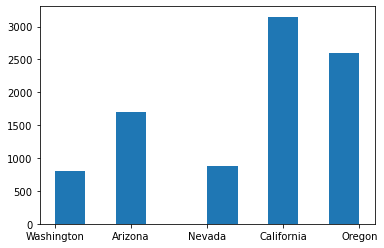

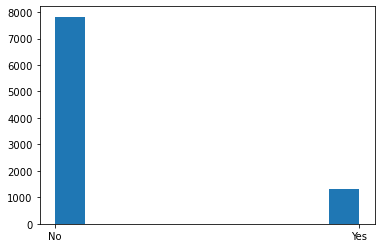

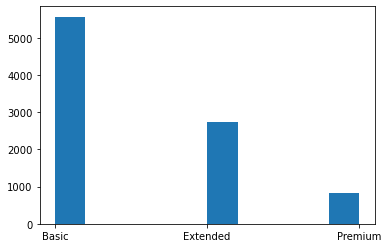

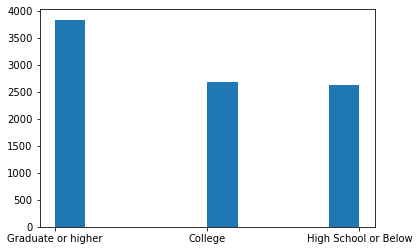

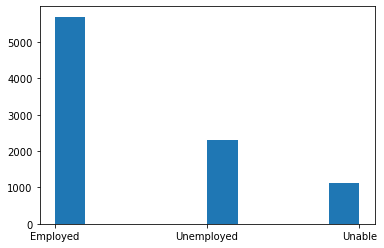

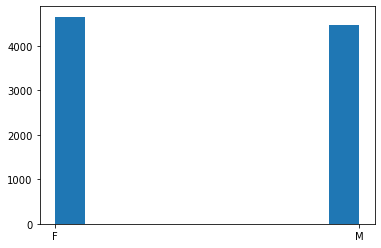

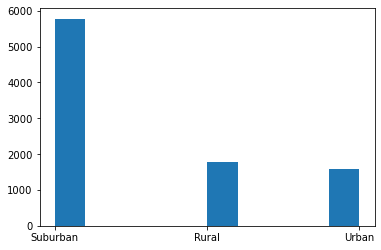

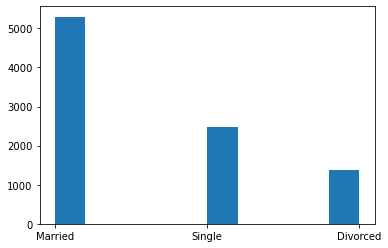

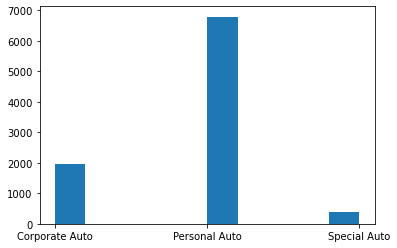

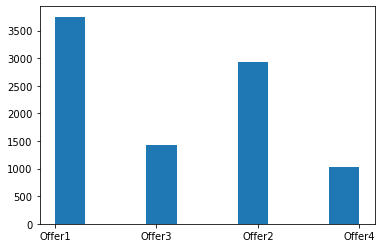

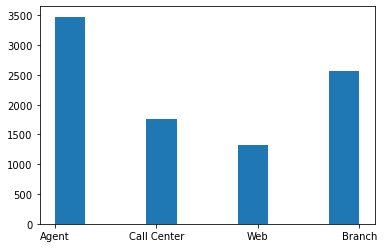

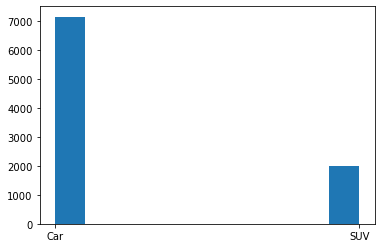

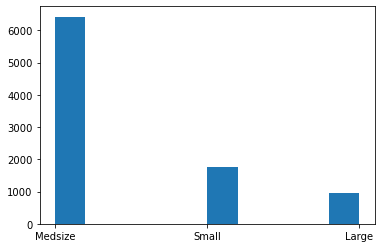

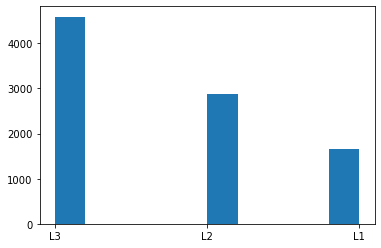

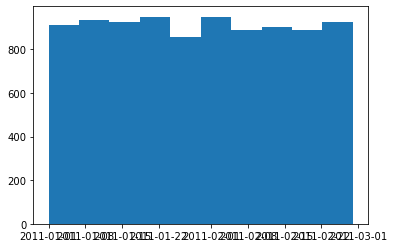

In [55]:
plot(new_df)

4. Plot time variable. Can you extract something from it?

In [1]:
sns.displot(data = categorical, x='effective_to_date', bins=len(categorical['effective_to_date'].unique())
            , multiple='stack'
            , kde=True).set( xlabel='Date'
                            , ylabel = 'Amount of Customers Responding')
plt.xticks(rotation = 45)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
!git add .

In [ ]:
!git commit -m "missing predictions but all data treated"

In [ ]:
!git push